In [1]:
import pandas as pd
import numpy as np 

In [2]:
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("../data/data.csv")

In [5]:
df.head(10)

,Name,NBA,Team,Season,GP,GS,MIN,FG,FGA,FG%,...,FT%,OR,DR,REB,AST,BLK,STL,PF,TO,PTS
0,Jaylen Brown,1,BOS,2016-17,78,20,17.2,2.5,5.4,45.4,...,68.5,0.6,2.2,2.8,0.8,0.2,0.4,1.8,0.9,6.6
1,Jaylen Brown,1,BOS,2017-18,70,70,30.7,5.3,11.5,46.5,...,64.4,0.9,4.0,4.9,1.6,0.4,1.0,2.6,1.8,14.5
2,Jaylen Brown,1,BOS,2018-19,74,25,25.9,5.0,10.7,46.5,...,65.8,0.9,3.4,4.2,1.4,0.4,0.9,2.5,1.3,13.0
3,Jaylen Brown,1,BOS,2019-20,57,57,33.9,7.5,15.6,48.1,...,72.4,1.1,5.3,6.4,2.1,0.4,1.1,2.9,2.2,20.3
4,Jaylen Brown,1,BOS,2020-21,58,58,34.5,9.3,19.2,48.4,...,76.4,1.2,4.8,6.0,3.4,0.6,1.2,2.9,2.7,24.7
5,Jaylen Brown,1,BOS,Career,337,230,27.7,5.6,11.9,47.3,...,69.9,0.9,3.8,4.7,1.8,0.4,0.9,2.5,1.7,15.1
6,Jaylen Brown,0,CAL,2015-16,34,34,27.6,4.8,11.1,43.1,...,65.4,1.1,4.3,5.4,2.0,0.6,0.8,3.2,3.1,14.6
7,Carsen Edwards,1,BOS,2019-20,37,0,9.5,1.1,3.5,32.8,...,68.4,0.2,1.1,1.3,0.6,0.1,0.3,0.9,0.4,3.3
8,Carsen Edwards,1,BOS,2020-21,31,1,8.9,1.5,3.6,42.3,...,84.6,0.1,0.7,0.8,0.5,0.0,0.2,0.8,0.2,4.0
9,Carsen Edwards,1,BOS,Career,68,1,9.2,1.3,3.5,37.2,...,75.0,0.1,0.9,1.1,0.6,0.1,0.3,0.9,0.3,3.6


In [6]:
#to get which year the player is in 

i = 0
while (i < len(df)):
    if(df.loc[i, 'NBA'] == 0 or df.loc[i, 'Season'] == 'Career'):
        df.loc[i, 'Year'] = 0
    else:
        j = i
        yrno = 1
        while(df.loc[j, 'Name'] == df.loc[i, 'Name'] and df.loc[j, 'NBA'] == 1 and df.loc[j, 'Season'] != 'Career'):
            df.loc[j, 'Year'] = yrno
            if(df.loc[j, 'Season'] == df.loc[j + 1, 'Season']):
                yrno -= 1
            yrno += 1
            j += 1
        i = j - 1
    i += 1

In [7]:
#join stats for players who got traded in between season

i = 0
while (i < len(df)-1):
    if(df.loc[i, 'Season'] == df.loc[i+1, 'Season'] and df.loc[i, 'Name'] == df.loc[i+1, 'Name']):
        df.loc[i, 'Team'] = df.loc[i, 'Team'] + "/" + df.loc[i+1, 'Team']
        df.loc[i, 'MIN'] = (df.loc[i, 'MIN']*df.loc[i, 'GP'] + df.loc[i+1, 'MIN']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'FG'] = (df.loc[i, 'FG']*df.loc[i, 'GP'] + df.loc[i+1, 'FG']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'FGA'] = (df.loc[i, 'FGA']*df.loc[i, 'GP'] + df.loc[i+1, 'FGA']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, '3PT'] = (df.loc[i, '3PT']*df.loc[i, 'GP'] + df.loc[i+1, '3PT']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, '3PTA'] = (df.loc[i, '3PTA']*df.loc[i, 'GP'] + df.loc[i+1, '3PTA']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'FT'] = (df.loc[i, 'FT']*df.loc[i, 'GP'] + df.loc[i+1, 'FT']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'FTA'] = (df.loc[i, 'FTA']*df.loc[i, 'GP'] + df.loc[i+1, 'FTA']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'OR'] = (df.loc[i, 'OR']*df.loc[i, 'GP'] + df.loc[i+1, 'OR']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'DR'] = (df.loc[i, 'DR']*df.loc[i, 'GP'] + df.loc[i+1, 'DR']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'AST'] = (df.loc[i, 'AST']*df.loc[i, 'GP'] + df.loc[i+1, 'AST']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'BLK'] = (df.loc[i, 'BLK']*df.loc[i, 'GP'] + df.loc[i+1, 'BLK']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'STL'] = (df.loc[i, 'STL']*df.loc[i, 'GP'] + df.loc[i+1, 'STL']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'PF'] = (df.loc[i, 'PF']*df.loc[i, 'GP'] + df.loc[i+1, 'PF']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'PTS'] = (df.loc[i, 'PTS']*df.loc[i, 'GP'] + df.loc[i+1, 'PTS']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'TO'] = (df.loc[i, 'TO']*df.loc[i, 'GP'] + df.loc[i+1, 'TO']*df.loc[i+1, 'GP'])/(df.loc[i, 'GP'] + df.loc[i+1, 'GP'])
        df.loc[i, 'GP'] = df.loc[i, 'GP'] + df.loc[i+1, 'GP']
        df.loc[i, 'GS'] = df.loc[i, 'GS'] + df.loc[i+1, 'GS']
        if(df.loc[i, 'FGA'] != 0):
            df.loc[i, 'FG%'] = df.loc[i, 'FG']/df.loc[i, 'FGA'] * 100
        else: 
            df.loc[i, 'FG%'] = 0
        if(df.loc[i, '3PTA'] != 0):
            df.loc[i, '3P%'] = df.loc[i, '3PT']/df.loc[i, '3PTA'] * 100
        else:
            df.loc[i, '3P%'] = 0
        if(df.loc[i, 'FTA'] != 0):
            df.loc[i, 'FT%'] = df.loc[i, 'FT']/df.loc[i, 'FTA'] * 100
        else:
            df.loc[i, 'FT%'] = 0
        df.loc[i, 'REB'] = df.loc[i, 'OR'] + df.loc[i+1, 'DR']
        df = df.drop(i + 1)
        i += 1
    i += 1

In [6]:
df_temp = df.copy()

In [8]:
columns = ['GP', 'GS', 'MIN', 'FG', 'FGA', '3PT', '3PTA', 'FT', 'FTA', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

In [8]:
for column in columns:
    for yr in range(1, 19):
        maxval = df_temp[df_temp['Year'] == yr][column].max()
        minval = df_temp[df_temp['Year'] == yr][column].min()

        df_temp.loc[df.Year == yr, column] = (df_temp.loc[df.Year == yr, column] - minval)/(maxval - minval)

In [9]:
df_temp = df_temp[(df_temp['NBA'] == 1) & (df_temp['Season'] != 'Career')]

In [10]:
df_temp["Score"] = df_temp["GP"] + 0.5*df_temp["GS"] + df_temp["MIN"] + df_temp["FG"] + 0.75*df_temp["FGA"] + df_temp["FT"] + 0.75*df_temp["FTA"] + 1.5*df_temp["REB"] + 1.5*df_temp["AST"] + df_temp["BLK"] + df_temp["STL"] - 0.5*df_temp["PF"] - df_temp["TO"] + 1.5*df_temp["PTS"]

In [11]:
df_temp.nlargest(20, ['Score'])

,Name,NBA,Team,Season,GP,GS,MIN,FG,FGA,FG%,...,DR,REB,AST,BLK,STL,PF,TO,PTS,Year,Score
2629,Lebron James,1,CLE,2017-18,1.000000,1.000000,1.000000,1.000000,1.000000,54.2,...,7.5,0.929412,1.000000,1.000000,0.875000,0.416667,1.000000,1.000000,15.0,11.060784
2632,Lebron James,1,LAL,2020-21,0.647059,1.000000,1.000000,1.000000,1.000000,51.3,...,7.0,1.000000,1.000000,1.000000,1.000000,0.761905,1.000000,1.000000,18.0,10.766106
2631,Lebron James,1,LAL,2019-20,0.969231,1.000000,1.000000,1.000000,1.000000,49.3,...,6.9,0.877551,1.000000,0.555556,1.000000,0.266667,1.000000,1.000000,17.0,10.707780
2630,Lebron James,1,LAL,2018-19,0.750000,0.785714,1.000000,1.000000,1.000000,51.0,...,7.4,1.000000,0.931034,0.545455,0.928571,0.347826,1.000000,1.000000,16.0,10.339522
2628,Lebron James,1,CLE,2016-17,0.907895,0.913580,1.000000,1.000000,0.966667,54.8,...,7.3,0.635514,1.000000,0.375000,0.600000,0.444444,1.000000,1.000000,14.0,9.387839
3692,Russell Westbrook,1,OKC,2016-17,0.987342,0.987805,0.896057,0.898990,1.000000,42.5,...,9.0,0.728101,0.971429,0.166667,0.608696,0.524112,1.000000,1.000000,9.0,9.338892
2616,Lebron James,1,CLE,2004-05,0.975309,0.975610,1.000000,0.951923,1.000000,47.2,...,6.0,0.560606,0.774194,0.250000,0.916667,0.439024,0.687500,0.918919,2.0,9.200430
2619,Lebron James,1,CLE,2007-08,0.910256,0.902439,1.000000,1.000000,1.000000,48.4,...,6.1,0.527046,0.639640,0.379310,0.739130,0.457143,0.785714,1.000000,5.0,8.975977
2627,Lebron James,1,CLE,2015-16,0.942029,0.950000,0.973154,1.000000,0.977778,52.0,...,6.0,0.550847,0.573913,0.400000,0.764706,0.565217,0.680851,0.937500,13.0,8.918399
201,Blake Griffin,1,LAC,2010-11,1.000000,1.000000,0.961039,0.965909,0.888889,50.6,...,8.8,1.000000,0.457831,0.200000,0.363636,0.756098,0.675000,1.000000,1.0,8.911917


In [51]:
df_temp[df_temp["Name"] == "Lebron James"]

,Name,NBA,Team,Season,GP,GS,MIN,FG,FGA,FG%,...,DR,REB,AST,BLK,STL,PF,TO,PTS,Year,Score
2615,Lebron James,1,CLE,2003-04,0.962963,0.963415,1.000000,0.897727,1.000000,41.7,...,4.2,0.454545,0.710843,0.280000,0.727273,0.463415,0.875000,0.928889,1.0,8.355822
2616,Lebron James,1,CLE,2004-05,0.975309,0.975610,1.000000,0.951923,1.000000,47.2,...,6.0,0.560606,0.774194,0.250000,0.916667,0.439024,0.687500,0.918919,2.0,9.200430
2617,Lebron James,1,CLE,2005-06,0.962500,0.963415,1.000000,1.000000,1.000000,48.0,...,6.1,0.449664,0.565217,0.216216,0.592593,0.594595,0.767442,1.000000,3.0,8.536687
2618,Lebron James,1,CLE,2006-07,0.948718,0.951220,1.000000,0.929293,0.923810,47.6,...,5.7,0.429577,0.541284,0.189189,0.548544,0.567568,0.775000,0.941176,4.0,7.939919
2619,Lebron James,1,CLE,2007-08,0.910256,0.902439,1.000000,1.000000,1.000000,48.4,...,6.1,0.527046,0.639640,0.379310,0.739130,0.457143,0.785714,1.000000,5.0,8.975977
2620,Lebron James,1,CLE,2008-09,0.987013,0.987805,0.964912,0.930000,0.969697,48.9,...,6.3,0.455541,0.612069,0.323529,0.695652,0.288889,0.717949,1.000000,6.0,8.876886
2621,Lebron James,1,CLE,2009-10,0.924051,0.926829,1.000000,0.922330,0.899471,50.3,...,6.4,0.427586,0.771644,0.416667,0.629032,0.294118,0.720930,0.924342,7.0,8.880677
2622,Lebron James,1,MIA,2010-11,0.962963,0.963415,1.000000,0.914894,0.803828,51.0,...,6.5,0.449731,0.625000,0.206897,0.666667,0.392857,0.631579,0.866667,8.0,8.193721
2623,Lebron James,1,MIA,2011-12,0.746835,0.756098,1.000000,0.878788,0.751220,53.1,...,6.4,0.522340,0.571429,0.333333,0.739130,0.270305,0.607843,0.839286,9.0,8.084816
2624,Lebron James,1,MIA,2012-13,0.925000,0.926829,1.000000,0.930000,0.707424,56.5,...,6.8,0.474453,0.610619,0.500000,0.800000,0.200000,0.565217,0.728863,10.0,8.200868


In [15]:
players = {}
count = 0

for name in nba_df['Name'].unique():
    players[count] = name
    count += 1

print(count)

427


In [19]:
# number of nba players from college

len(df[df['NBA'] == 0]['Name'].unique())

427

In [10]:
# get only college players in the league

use_df = df.iloc[0:0,:].copy()
for name in df[df['NBA'] == 0]['Name'].unique():
    use_df = pd.concat([use_df, df[df['Name'] == name]])

In [11]:
use_df[use_df["Name"] == "Carmelo Anthony"]

,Name,NBA,Team,Season,GP,GS,MIN,FG,FGA,FG%,...,OR,DR,REB,AST,BLK,STL,PF,TO,PTS,Year
1870,Carmelo Anthony,1,DEN,2003-04,82,82,36.500000,7.60000,17.90000,42.600000,...,2.2,3.800000,6.1,2.80000,0.5,1.2,2.70000,3.00000,21.000000,1.0
1871,Carmelo Anthony,1,DEN,2004-05,75,75,34.800000,7.10000,16.40000,43.100000,...,1.9,3.800000,5.7,2.60000,0.4,0.9,3.10000,3.00000,20.800000,2.0
1872,Carmelo Anthony,1,DEN,2005-06,80,80,36.800000,9.50000,19.70000,48.100000,...,1.5,3.400000,4.9,2.70000,0.5,1.1,2.90000,2.70000,26.500000,3.0
1873,Carmelo Anthony,1,DEN,2006-07,65,65,38.200000,10.60000,22.40000,47.600000,...,2.2,3.800000,6.0,3.80000,0.4,1.2,3.10000,3.60000,28.900000,4.0
1874,Carmelo Anthony,1,DEN,2007-08,77,77,36.400000,9.50000,19.20000,49.200000,...,2.3,5.100000,7.4,3.40000,0.5,1.3,3.30000,3.30000,25.700000,5.0
1875,Carmelo Anthony,1,DEN,2008-09,66,66,34.500000,8.10000,18.30000,44.300000,...,1.6,5.200000,6.8,3.40000,0.4,1.1,3.00000,3.00000,22.800000,6.0
1876,Carmelo Anthony,1,DEN,2009-10,69,69,38.200000,10.00000,21.80000,45.800000,...,2.2,4.400000,6.6,3.20000,0.4,1.3,3.30000,3.00000,28.200000,7.0
1877,Carmelo Anthony,1,DEN/NY,2010-11,77,77,35.745455,8.84026,19.51039,45.310524,...,1.5,5.784416,6.7,2.87013,0.6,0.9,2.91039,2.65974,25.585714,8.0
1879,Carmelo Anthony,1,NY,2011-12,55,55,34.100000,8.00000,18.60000,43.000000,...,1.6,4.700000,6.3,3.60000,0.4,1.1,2.80000,2.60000,22.600000,9.0
1880,Carmelo Anthony,1,NY,2012-13,67,67,37.000000,10.00000,22.20000,44.900000,...,2.0,4.900000,6.9,2.60000,0.5,0.8,3.10000,2.60000,28.700000,10.0


In [12]:
# normalize every stat with maximum of each year in the league

for column in columns:
    for yr in range(1, 19):
        maxval = use_df[use_df['Year'] == yr][column].max()
        minval = use_df[use_df['Year'] == yr][column].min()

        use_df.loc[use_df.Year == yr, column] = (use_df.loc[use_df.Year == yr, column] - minval)/(maxval - minval)

In [13]:
# get 

nba_df = use_df[(use_df['NBA'] == 1) & (use_df['Season'] != 'Career')]

In [16]:
nba_df["Score"] = nba_df["GP"] + 0.5*nba_df["GS"] + nba_df["MIN"] + nba_df["FG"] + 0.75*nba_df["FGA"] + nba_df["FT"] + 0.75*nba_df["FTA"] + 1.5*nba_df["REB"] + 1.5*nba_df["AST"] + nba_df["BLK"] + nba_df["STL"] - 0.5*nba_df["PF"] - nba_df["TO"] + 1.5*nba_df["PTS"]

<ipython-input-16-f0b932141937>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df["Score"] = nba_df["GP"] + 0.5*nba_df["GS"] + nba_df["MIN"] + nba_df["FG"] + 0.75*nba_df["FGA"] + nba_df["FT"] + 0.75*nba_df["FTA"] + 1.5*nba_df["REB"] + 1.5*nba_df["AST"] + nba_df["BLK"] + nba_df["STL"] - 0.5*nba_df["PF"] - nba_df["TO"] + 1.5*nba_df["PTS"]


In [17]:
for yr in range(1, 19):
    print(yr, nba_df[nba_df['Score'] == nba_df[nba_df["Year"] == yr]['Score'].max()]["Name"])

1 201    Blake Griffin
Name: Name, dtype: object
2 3129    Trae Young
Name: Name, dtype: object
3 167    Kevin Durant
Name: Name, dtype: object
4 2824    Chris Paul
Name: Name, dtype: object
5 2546    Anthony Davis
Name: Name, dtype: object
6 2547    Anthony Davis
Name: Name, dtype: object
7 171    Kevin Durant
Name: Name, dtype: object
8 224    James Harden
Name: Name, dtype: object
9 3692    Russell Westbrook
Name: Name, dtype: object
10 226    James Harden
Name: Name, dtype: object
11 227    James Harden
Name: Name, dtype: object
12 228    James Harden
Name: Name, dtype: object
13 3696    Russell Westbrook
Name: Name, dtype: object
14 1884    Carmelo Anthony
Name: Name, dtype: object
15 2835    Chris Paul
Name: Name, dtype: object
16 2836    Chris Paul
Name: Name, dtype: object
17 1887    Carmelo Anthony
Name: Name, dtype: object
18 1888    Carmelo Anthony
Name: Name, dtype: object


In [18]:
careers = {}
for name in nba_df['Name'].unique():
    temp = nba_df[nba_df['Name'] == name]['Score'].tolist()
    careers[name] = temp
    
careers

{'Jaylen Brown': [3.0813550230164486,
  4.9922692597428115,
  4.012359123063118,
  5.193873793089594,
  6.252347427973578],
 'Carsen Edwards': [1.5069883935513058, 1.2282481647561259],
 'Tacko Fall': [1.0514247374094658, 1.2981667921840827],
 'Luke Kornet': [2.529687194961374,
  2.959501810021365,
  2.072464584103658,
  1.132897166279509],
 'Romeo Langford': [1.5107350893561464, 1.3920325239395528],
 'Aaron Nesmith': [2.0213301833178945],
 'Semi Ojeleye': [2.0570117713151816,
  1.6042535711622112,
  1.823345246285446,
  1.6672070314382885],
 'Jabari Parker': [4.509486184193789,
  5.281413240060603,
  5.5388117070910745,
  3.032374222902043,
  4.29346729990345,
  3.4394293379164864,
  0.9299161986767299],
 'Payton Pritchard': [3.105349651773279],
 'Marcus Smart': [4.3412244025173194,
  4.192100403769146,
  4.4692029618490485,
  3.437562425711599,
  4.19675631168387,
  4.533133782959936,
  4.498619372542641],
 'Jayson Tatum': [5.933566705865698,
  5.8516454115873815,
  6.572486153297623,

In [19]:
yrs = np.zeros(427)

i = 0
for key in careers:
    yrs[i] = len(careers[key])
    i += 1

In [20]:
yrs.mean()

5.098360655737705

In [21]:
k_df = pd.DataFrame(columns=["name", "yr1", "yr2", "yr3", "yr4", "yr5"])


for key in careers:
    if(len(careers[key]) > 4):
        k_df = k_df.append({"name": key, "yr1": careers[key][0], "yr2": careers[key][1], "yr3": careers[key][2], "yr4": careers[key][3], "yr5": careers[key][4]}, ignore_index=True)
        
k_df.head(20)

,name,yr1,yr2,yr3,yr4,yr5
0,Jaylen Brown,3.081355,4.992269,4.012359,5.193874,6.252347
1,Jabari Parker,4.509486,5.281413,5.538812,3.032374,4.293467
2,Marcus Smart,4.341224,4.192100,4.469203,3.437562,4.196756
3,Tristan Thompson,4.182719,5.523328,4.968599,3.544967,4.067103
4,Kemba Walker,5.280446,6.977358,6.041166,5.663410,6.936800
5,Spencer Dinwiddie,2.284707,1.668747,3.077172,4.693259,4.421654
6,Kevin Durant,7.426338,7.741432,8.354383,7.568865,7.776125
7,Jeff Green,4.745309,5.918814,5.486303,4.285847,4.223863
8,Blake Griffin,8.972165,7.105959,6.144126,7.205792,6.788431
9,James Harden,4.215711,4.490492,4.674839,7.491377,7.395864


In [22]:
model = KMeans(n_clusters = 8)
features = k_df[['yr1', 'yr2', 'yr3', 'yr4', 'yr5']]
fit = model.fit(features)
k_df['cluster'] = model.predict(features)
k_df.head(20)

,name,yr1,yr2,yr3,yr4,yr5,cluster
0,Jaylen Brown,3.081355,4.992269,4.012359,5.193874,6.252347,3
1,Jabari Parker,4.509486,5.281413,5.538812,3.032374,4.293467,5
2,Marcus Smart,4.341224,4.192100,4.469203,3.437562,4.196756,5
3,Tristan Thompson,4.182719,5.523328,4.968599,3.544967,4.067103,5
4,Kemba Walker,5.280446,6.977358,6.041166,5.663410,6.936800,7
5,Spencer Dinwiddie,2.284707,1.668747,3.077172,4.693259,4.421654,2
6,Kevin Durant,7.426338,7.741432,8.354383,7.568865,7.776125,0
7,Jeff Green,4.745309,5.918814,5.486303,4.285847,4.223863,3
8,Blake Griffin,8.972165,7.105959,6.144126,7.205792,6.788431,0
9,James Harden,4.215711,4.490492,4.674839,7.491377,7.395864,3


In [25]:
k_df[k_df['cluster'] == 1]

,name,yr1,yr2,yr3,yr4,yr5,cluster
19,Julius Randle,0.522932,5.184341,4.907833,4.743842,6.084402,1
24,Tobias Harris,2.125582,4.349498,4.660216,5.159268,5.336223,1
32,Pascal Siakam,2.684141,3.569063,5.558351,6.101826,6.395185,1
33,Fred Vanvleet,1.504454,3.557156,3.932050,5.473253,6.240532,1
58,Tj Warren,2.272797,3.336610,4.769283,5.403238,4.758426,1
63,Khris Middleton,2.300642,4.535793,4.623942,5.625931,4.008537,1
65,Jeff Teague,2.182920,2.642359,4.804166,5.092585,5.572563,1
66,Pj Tucker,0.764926,3.601849,4.512105,4.026133,4.239219,1
68,Aaron Gordon,2.595471,4.470232,4.689907,5.317554,5.665567,1
82,Robert Covington,0.666562,4.775598,4.264569,4.610368,5.034881,1


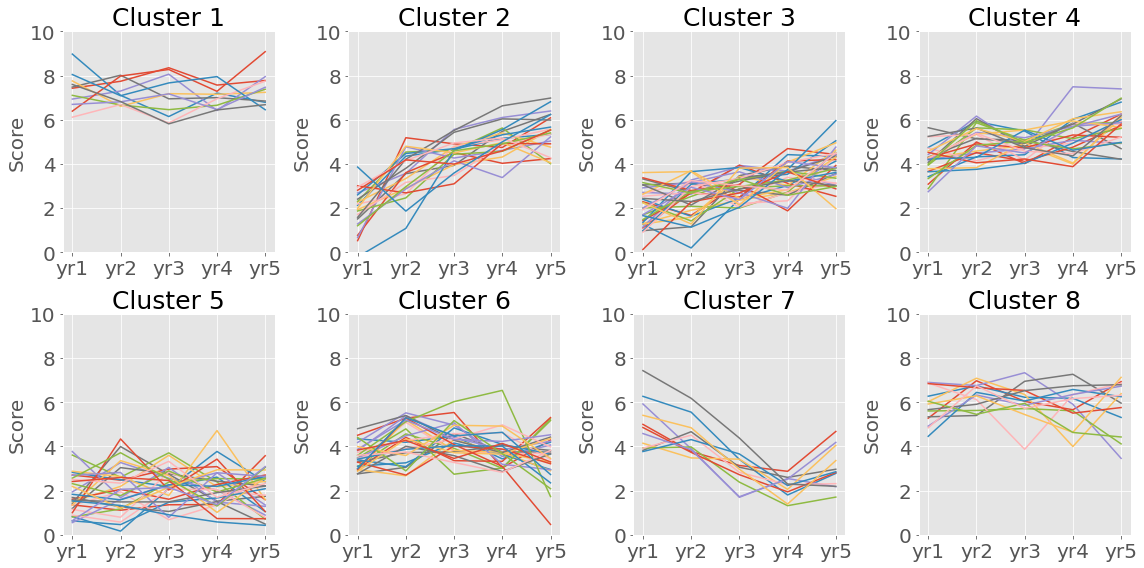

In [24]:
plt.figure(figsize=(16, 8)) 

for i in range(1, 9):
    plt.subplot(2, 4, i)
    temp = k_df[k_df['cluster'] == i - 1][['yr1', 'yr2', 'yr3', 'yr4', 'yr5']]
    plt.plot(temp.T)
    plt.tight_layout()
    plt.xticks(fontsize = 20)
    plt.ylim([0, 10])
    plt.yticks(fontsize = 20)
    plt.title("Cluster " + str(i), fontsize = 25)
    plt.ylabel("Score", fontsize = 20)